In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 


In [2]:
df=pd.read_excel("BB_Dataset.xlsx")

In [13]:
df.head()

,SERIAL_NUMBER,BANK_NAME,BANK_ID,BRANCH_NAME,BRANCH_CODE,DIVISION_NAME,DISTRICT_NAME,THANA_NAME
0,1,AGRANI BANK PLC,11,BANDARBAN,110001,CHATTOGRAM,BANDARBAN,BANDARBAN SADAR
1,2,AGRANI BANK PLC,11,MEDICAL COLLEGE,110002,CHATTOGRAM,CUMILLA,KOTWALI_CUMILLA
2,3,AGRANI BANK PLC,11,KACHUA BAZAR,110003,CHATTOGRAM,CHANDPUR,KACHUA
3,4,AGRANI BANK PLC,11,SHIBPUR,110004,CHATTOGRAM,BRAHMANBARIA,NABINAGAR
4,5,AGRANI BANK PLC,11,CHATORI CHOWMUHUNI,110005,CHATTOGRAM,CHATTOGRAM,ANWARA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11373 entries, 0 to 11372
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SERIAL
 NUMBER  11373 non-null  int64 
 1   BANK NAME       11373 non-null  object
 2   BANK ID         11373 non-null  int64 
 3   BRANCH NAME     11373 non-null  object
 4   BRANCH CODE     11373 non-null  int64 
 5   DIVISION NAME   11373 non-null  object
 6   DISTRICT NAME   11373 non-null  object
 7   THANA NAME      11373 non-null  object
dtypes: int64(3), object(5)
memory usage: 710.9+ KB


In [8]:
df.isnull().sum()

SERIAL\n NUMBER    0
BANK NAME          0
BANK ID            0
BRANCH NAME        0
BRANCH CODE        0
DIVISION NAME      0
DISTRICT NAME      0
THANA NAME         0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.shape
df['BANK_NAME'].unique()


array(['AGRANI BANK PLC', 'JANATA BANK PLC', 'RUPALI BANK PLC',
       'SONALI BANK PLC', 'STANDARD CHARTERED BANK LTD',
       'STATE BANK OF INDIA', 'HABIB BANK LTD', 'CITI BANK NA LTD',
       'COMMERCIAL BANK OF CEYLON', 'NATIONAL BANK OF PAKISTAN',
       'BANGLADESH KRISHI BANK', 'RAJSHAHI KRISHI BANK', 'BASIC BANK LTD',
       'BANGLADESH DEVELOPMENT BANK PLC', 'AB BANK PLC',
       'ISLAMI BANK BANGLADESH PLC', 'NATIONAL BANK LTD', 'CITY BANK PLC',
       'IFIC BANK PLC', 'UNITED COMMERCIAL BANK PLC', 'PUBALI BANK PLC',
       'UTTARA BANK PLC', 'ICB ISLAMI BANK LTD', 'SHIMANTO BANK PLC',
       'EASTERN BANK PLC', 'NATIONAL CREDIT AND COMMERCE BANK\n PLC',
       'PRIME BANK PLC', 'SOUTHEAST BANK PLC', 'DHAKA BANK PLC',
       'AL ARAFA ISLAMI BANK PLC', 'SOCIAL ISLAMI BANK PLC',
       'DUTCH BANGLA BANK PLC', 'MERCANTILE BANK PLC',
       'STANDARD BANK PLC', 'ONE BANK PLC', 'EXIM BANK LTD',
       'BANGLADESH COMMERCE BANK LTD', 'MUTUAL TRUST BANK PLC',
       'PREMIER BANK

Division-wise Branch Distribution

In [15]:
df['DIVISION_NAME'].value_counts()

DIVISION_NAME
DHAKA         3900
CHATTOGRAM    2639
RAJSHAHI      1129
KHULNA        1086
SYLHET         816
RANGPUR        763
BARISHAL       570
MYMENSINGH     470
Name: count, dtype: int64

<Axes: title={'center': 'Division-wise Bank Branch Distribution'}, xlabel='DIVISION_NAME'>

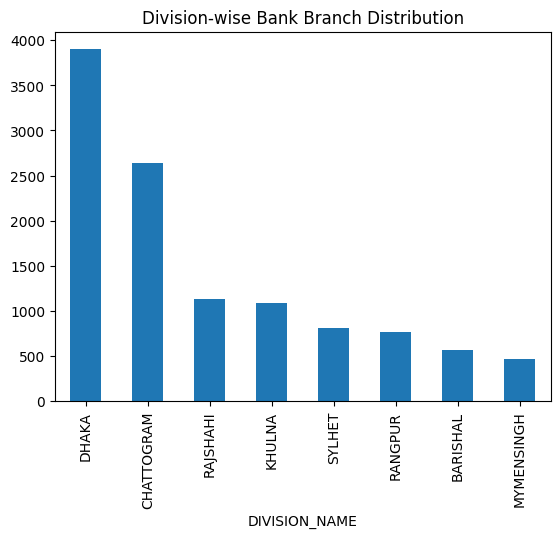

In [16]:
df['DIVISION_NAME'].value_counts().plot(kind='bar', title='Division-wise Bank Branch Distribution')


District-wise Analysis

In [22]:
district_counts=df['DISTRICT_NAME'].value_counts()
 

 Top 10 Districts

In [21]:
district_counts.head(10)

DISTRICT_NAME
DHAKA          2082
CHATTOGRAM     1113
SYLHET          410
CUMILLA         391
NARAYANGANJ     291
GAZIPUR         273
NOAKHALI        238
TANGAIL         220
KHULNA          217
BOGURA          215
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Districts by Number of Branches'}, ylabel='DISTRICT_NAME'>

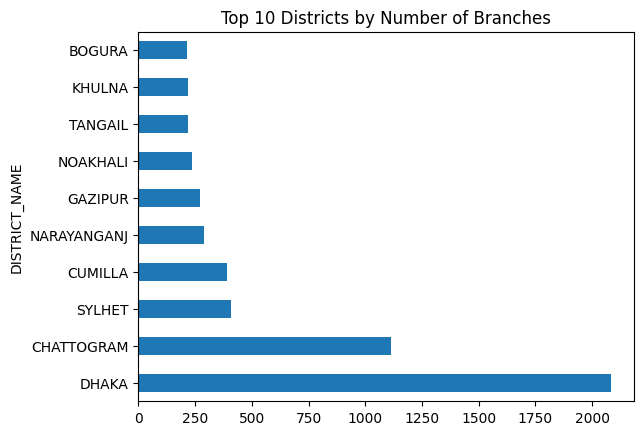

In [24]:
district_counts.head(10).plot(kind='barh', title='Top 10 Districts by Number of Branches')


<Axes: title={'center': 'Bottom 10 Districts by Number of Branches'}, ylabel='DISTRICT_NAME'>

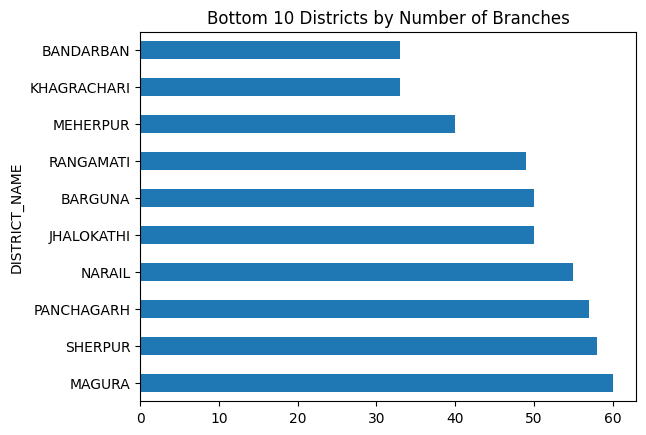

In [39]:
district_counts.tail(10).plot(kind='barh', title='Bottom 10 Districts by Number of Branches')

Thana-level Micro Analysis

In [32]:
thana_level=df['THANA_NAME'].value_counts().head(10)
thana_level

THANA_NAME
KOTWALI                  216
KOTWALI_CHATTOGRA\n M    191
MOTIJHEEL                164
GULSHAN                  147
KOTWALI_SYLHET           141
DOUBLE MOORING           103
CHAWKBAZAR                98
KOTWALI_CUMILLA           89
NARAYANGANJ SADAR         88
ASHULIA                   83
Name: count, dtype: int64

Branch Code Analysis

In [34]:
df['BRANCH_CODE'].nunique()

11373

<Axes: title={'center': 'Bottom 10 Districts (Under-served Areas)'}, xlabel='THANA_NAME'>

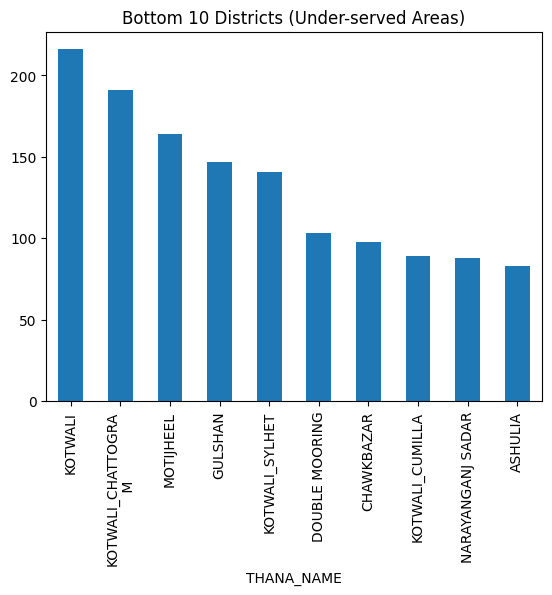

In [36]:
thana_level.tail(10).plot(kind='bar', title='Bottom 10  Thanas (Under-served Areas)')


<Axes: title={'center': 'Bottom 10  Thanas by Number of Branches'}, ylabel='THANA_NAME'>

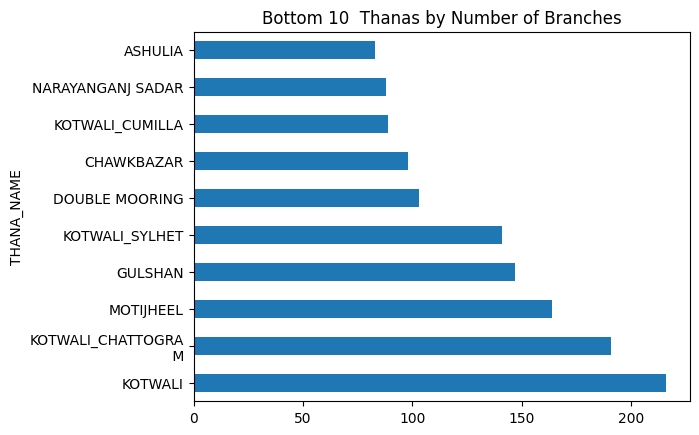

In [40]:
thana_level.tail(10).plot(kind='barh', title='Bottom 10  Thanas by Number of Branches')

Bank Expansion Analysis
 Apply Logic

Low branch count

But located inside high-activity divisions

Population & economic growth potential (assumed)

In [42]:
expansion_candidates = district_counts[
     district_counts <  district_counts.mean()
]
expansion_candidates.head()

DISTRICT_NAME
DINAJPUR       177
NARSHINGDI     176
PABNA          168
MOULVIBAZAR    166
FENI           159
Name: count, dtype: int64

#Recommendation : 

Under-served districts within high-performing divisions ( DINAJPUR,NARSHINGDI,PABNA,MOULVIBAZAR,FENI )           
 should be prioritized for future bank branch expansion.

Operational Coverage Analysis

In [43]:
coverage = df.groupby('DIVISION_NAME')['DISTRICT_NAME'].nunique()
coverage

DIVISION_NAME
BARISHAL       6
CHATTOGRAM    11
DHAKA         13
KHULNA        10
MYMENSINGH     4
RAJSHAHI       8
RANGPUR        8
SYLHET         4
Name: DISTRICT_NAME, dtype: int64

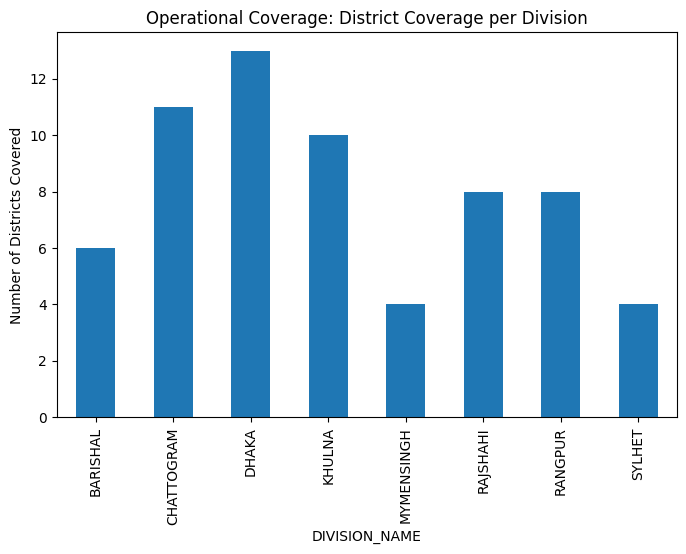

In [45]:
coverage.plot(kind='bar', figsize=(8,5))
plt.title('Operational Coverage: District Coverage per Division')
plt.ylabel('Number of Districts Covered')
plt.show()

Divisions with higher district coverage indicate wider operational reach and better service accessibility.